# Implementing a basic Temporal Learning (TD(0)) algorithm 

## 1. Setup libraries and imports

In [7]:
import sys
import os

# Add META-RL-SNAKE (project root) to path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from meta_snake_rl.env.snake_env import SnakeEnv, select_action, get_state
from meta_snake_rl.utils.constants import ACTIONS, OPPOSITE

## 2. TD(0) Hyperparameters and Q-table initializations

In [ ]:
# Q-Table
Q = {}

# Training hyperparameters
alpha, gamma, epsilon, min_epsilon, decay_rate, episodes = 0.1, 0.95, 1.0, 0.01, 0.9985, 5000

# Metrics logging
#episode_rewards = []

## 3. Environment Creation

In [34]:
env = SnakeEnv(grid_size=15, variant="classic")

## 4. Training Loop 



### Code for loop

In [35]:
def sarsa_training_loop(alpha, gamma, epsilon, min_epsilon, decay_rate, episodes, episode_rewards):
    for episode in range(episodes):
        total_reward = 0
        env.reset()
        state = get_state(env.snake, env.apple, env.direction, env.grid_size)
        direction = env.direction
        done = False
        action = select_action(Q, state, epsilon, direction)

        while not done:
            _, reward, done, _ = env.step(action)
            next_state = get_state(env.snake, env.apple, env.direction, env.grid_size)
            next_direction = env.direction
            next_action = select_action(Q, next_state, epsilon, next_direction)

            if state not in Q:
                Q[state] = {a: 0 for a in ACTIONS}
            if next_state not in Q:
                Q[next_state] = {a: 0 for a in ACTIONS}
            
            # SARSA update
            old_q = Q[state][action]
            new_q = Q[next_state][next_action]
            Q[state][action] += alpha * (reward + gamma * new_q - old_q)

            # Move to next
            state = next_state
            action = next_action
            direction = next_direction
            total_reward += reward

        episode_rewards.append(total_reward)
        epsilon = max(min_epsilon, epsilon * decay_rate)

        if episode % 50 == 0:
            print(f"Episode {episode}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")
    
    return episode_rewards

### Code for MatPlotLib Display


In [36]:
def plot_rewards_progress(episode_rewards):
    plt.figure(figsize=(12, 6))
    plt.plot(episode_rewards, label='Episode Reward')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("SARSA Training Progress")
    plt.grid(True)
    plt.legend()
    plt.show()

### Configuration #1 Hyperparameters
### Hyperparameters

- Learning rate: $\alpha = 0.1$
- Discount factor: $\gamma = 0.95$
- Exploration rate: $\epsilon = 1.0$
- Minimum exploration rate: $\epsilon_{\text{min}} = 0.01$
- Decay rate: $0.9985$
- Episodes: $5000$

In [37]:
episode_rewards_1 = []
episode_rewards_1 = sarsa_training_loop(alpha, gamma, epsilon, min_epsilon, decay_rate, episodes, episode_rewards_1)

Episode 0, Total Reward: -1, Epsilon: 0.999
Episode 50, Total Reward: -1, Epsilon: 0.926
Episode 100, Total Reward: -1, Epsilon: 0.859
Episode 150, Total Reward: 0, Epsilon: 0.797
Episode 200, Total Reward: -1, Epsilon: 0.740
Episode 250, Total Reward: 0, Epsilon: 0.686
Episode 300, Total Reward: 1, Epsilon: 0.636
Episode 350, Total Reward: 0, Epsilon: 0.590
Episode 400, Total Reward: 1, Epsilon: 0.548
Episode 450, Total Reward: -1, Epsilon: 0.508
Episode 500, Total Reward: -1, Epsilon: 0.471
Episode 550, Total Reward: 0, Epsilon: 0.437
Episode 600, Total Reward: 2, Epsilon: 0.406
Episode 650, Total Reward: 1, Epsilon: 0.376
Episode 700, Total Reward: 2, Epsilon: 0.349
Episode 750, Total Reward: 3, Epsilon: 0.324
Episode 800, Total Reward: 6, Epsilon: 0.300
Episode 850, Total Reward: 4, Epsilon: 0.279
Episode 900, Total Reward: 4, Epsilon: 0.259
Episode 950, Total Reward: 4, Epsilon: 0.240
Episode 1000, Total Reward: 11, Epsilon: 0.223
Episode 1050, Total Reward: 9, Epsilon: 0.206
Epis

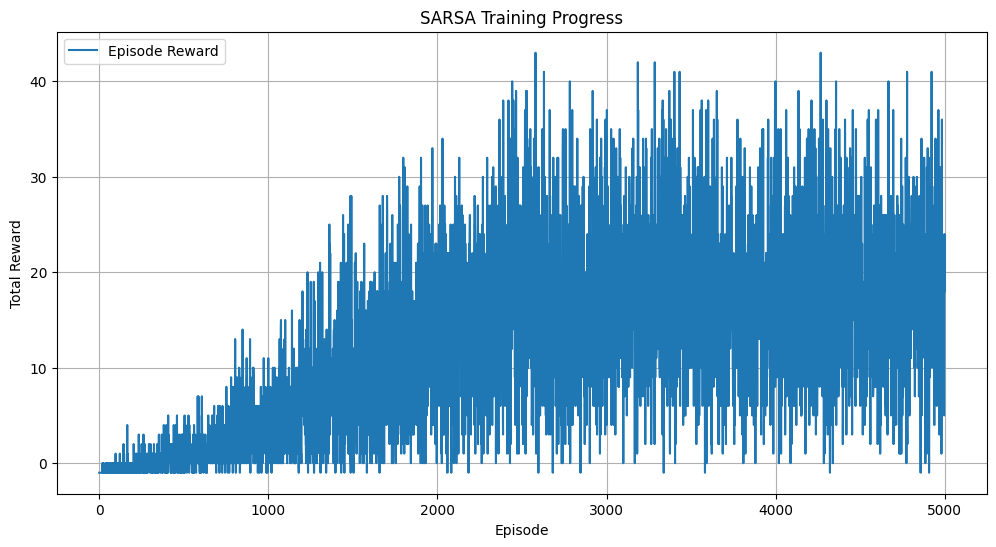

In [39]:
plot_rewards_progress(episode_rewards_1)

### Configuration #2 Hyperparameters
### Hyperparameters

- Learning rate: $\alpha = 0.1$
- Discount factor: $\gamma = 0.95$
- Exploration rate: $\epsilon = 1.0$
- Minimum exploration rate: $\epsilon_{\text{min}} = 0.01$
- Decay rate: $0.995$
- Episodes: $2000$

In [42]:
Q = {}
alpha, gamma, epsilon, min_epsilon, decay_rate, episodes = 0.1, 0.95, 1.0, 0.01, 0.995, 2000
episode_rewards_2 = []
episode_rewards_2 = sarsa_training_loop(alpha, gamma, epsilon, min_epsilon, decay_rate, episodes, episode_rewards_2)

Episode 0, Total Reward: -1, Epsilon: 0.995
Episode 50, Total Reward: -1, Epsilon: 0.774
Episode 100, Total Reward: 0, Epsilon: 0.603
Episode 150, Total Reward: 0, Epsilon: 0.469
Episode 200, Total Reward: 5, Epsilon: 0.365
Episode 250, Total Reward: 8, Epsilon: 0.284
Episode 300, Total Reward: 3, Epsilon: 0.221
Episode 350, Total Reward: 0, Epsilon: 0.172
Episode 400, Total Reward: 5, Epsilon: 0.134
Episode 450, Total Reward: 24, Epsilon: 0.104
Episode 500, Total Reward: 7, Epsilon: 0.081
Episode 550, Total Reward: 7, Epsilon: 0.063
Episode 600, Total Reward: 1, Epsilon: 0.049
Episode 650, Total Reward: 19, Epsilon: 0.038
Episode 700, Total Reward: 17, Epsilon: 0.030
Episode 750, Total Reward: 32, Epsilon: 0.023
Episode 800, Total Reward: 13, Epsilon: 0.018
Episode 850, Total Reward: 21, Epsilon: 0.014
Episode 900, Total Reward: 7, Epsilon: 0.011
Episode 950, Total Reward: 19, Epsilon: 0.010
Episode 1000, Total Reward: 29, Epsilon: 0.010
Episode 1050, Total Reward: 11, Epsilon: 0.010


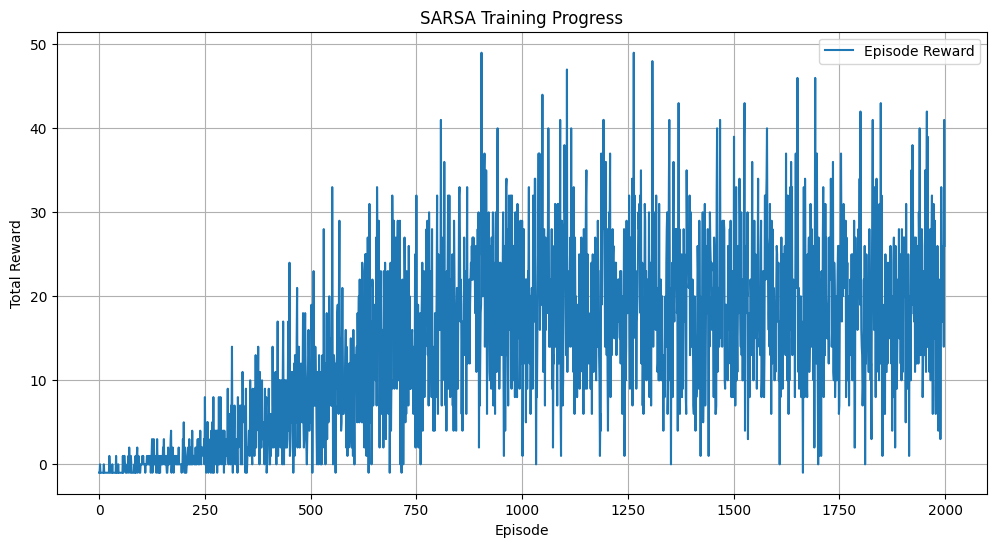

In [43]:
plot_rewards_progress(episode_rewards_2)

5. Plot Training Curve using MatPlotLib

## Findings so far? 
Given the current configuration, the improvements seems to be plateauing after around the 3000 episode mark. 
